In [4]:
import sys
sys.path.append("../../../")

## 数据

In [5]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter

E:\a-soft\Anaconda3\envs\mlproduct\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\a-soft\Anaconda3\envs\mlproduct\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


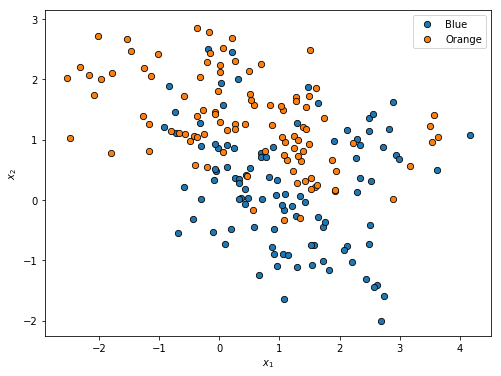

In [6]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train)
plt.show()

## 梯度提升分类

In [7]:
from pylib.utils.functions_for_classification import plot_decision_boundary
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

E:\a-soft\Anaconda3\envs\mlproduct\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)

GradientBoostingClassifier()

In [6]:
train_err = 1 - gbdt.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.010


In [7]:
test_err = 1 - gbdt.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.258


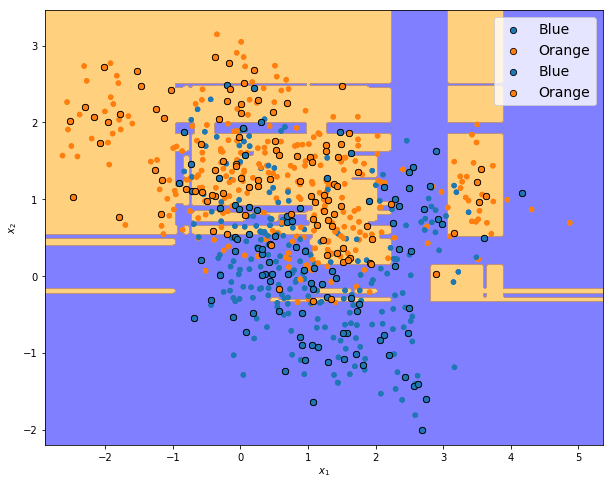

In [8]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_scatter(X_train, y_train, X_test, y_test)
plot_decision_boundary(X_train, y_train, X_test, y_test, gbdt)
plt.show()

### 寻找最优参数

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
param_dist = {'n_estimators': np.arange(50, 550, 50),
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.3],
              'max_depth': [1, 3, 5],
              'min_samples_leaf': [2, 5, 10, 20],
              'subsample': np.arange(0.3, 1, 0.1),
              'loss': ['deviance', 'exponential']}
gbt_cv = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                            param_dist,
                            cv=10,
                            n_jobs=-1,
                            random_state=42)
gbt_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.3],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 3, 5],
                                        'min_samples_leaf': [2, 5, 10, 20],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
                                        'subsample': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42)

In [12]:
gbt_cv.best_params_

{'subsample': 0.3,
 'n_estimators': 50,
 'min_samples_leaf': 5,
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.1}

### 使用最优模型

In [13]:
gbt_best = gbt_cv.best_estimator_

In [14]:
train_err = 1 - gbt_best.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.120


In [15]:
test_err = 1 - gbt_best.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.248


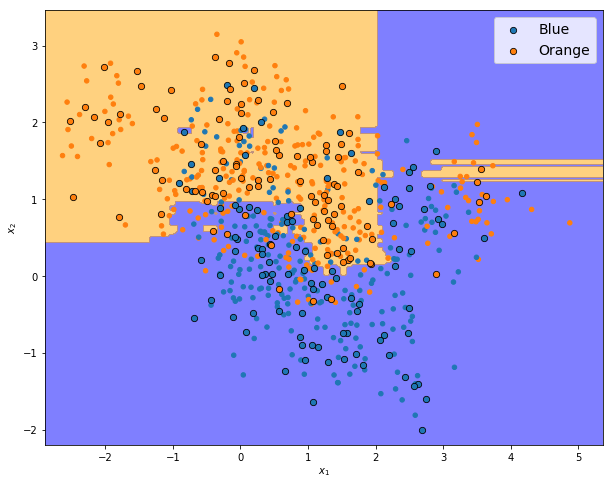

In [16]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, gbt_best)
plt.show()